**OBJECTIVE**:

            1.for this mini-project we will work with an Ecommerce store csv file.
            2.the objective of this analysis is to determine whether it is best to focs on the Web APP or the mobile APP

# 1. Get the Data

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [100]:
df = pd.read_csv("Ecommerce Customers.csv")
df.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**clean the data**

In [101]:
df['Address'] = df['Address'].str.replace('\n',' ')
df.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel Wrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common Diazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582 Cobbborough, DC...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway Port Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage Port Jacobville, PR 37...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [102]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# Exploratory Data Analysis

**use jointplot to compare the time spent on the web with regards to the yearly amount spent**

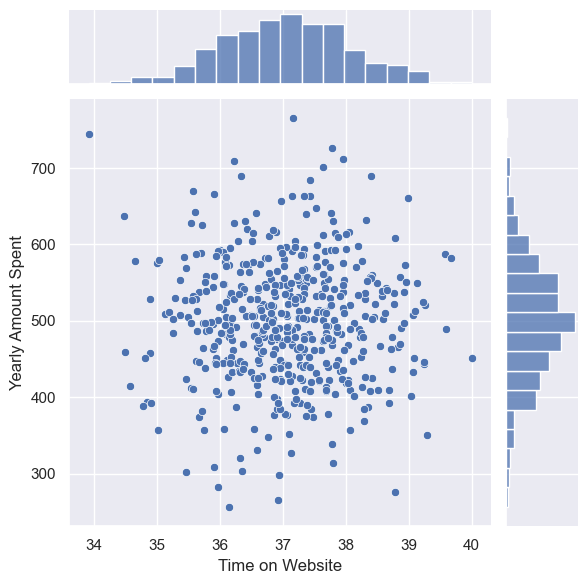

In [104]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent',data=df)

**use joint plot to compare time spent on App with regards to the yearly amount spent**

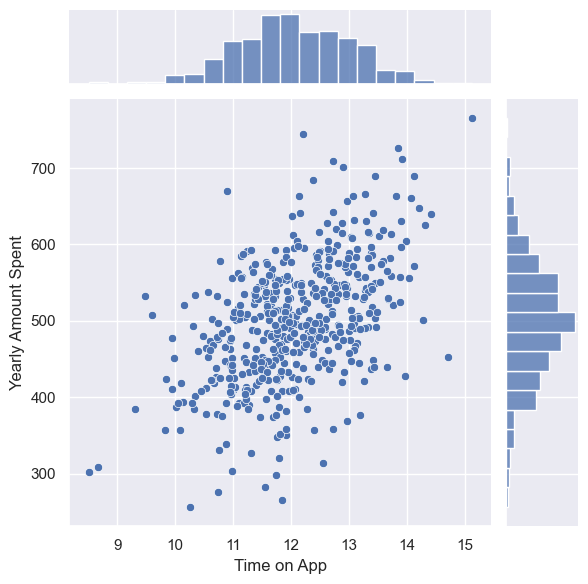

In [105]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent',data=df)

**use joint plot to compare the time on app with regards to the length of the memebership**

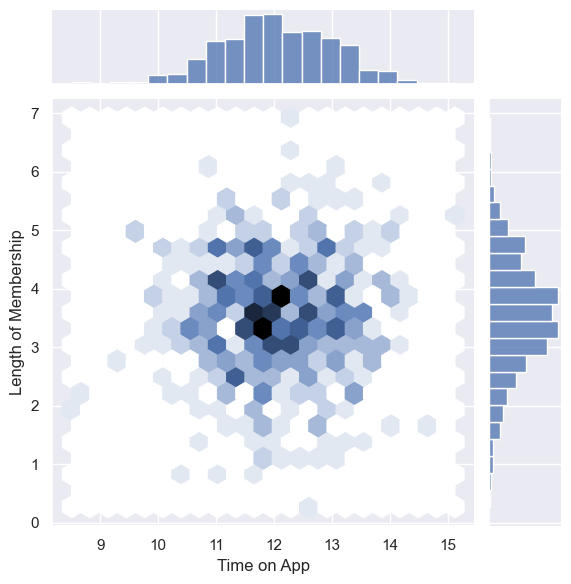

In [106]:
sns.jointplot(x='Time on App', y='Length of Membership',data=df,kind='hex')

**explore correlation relationships across the entire dataset**

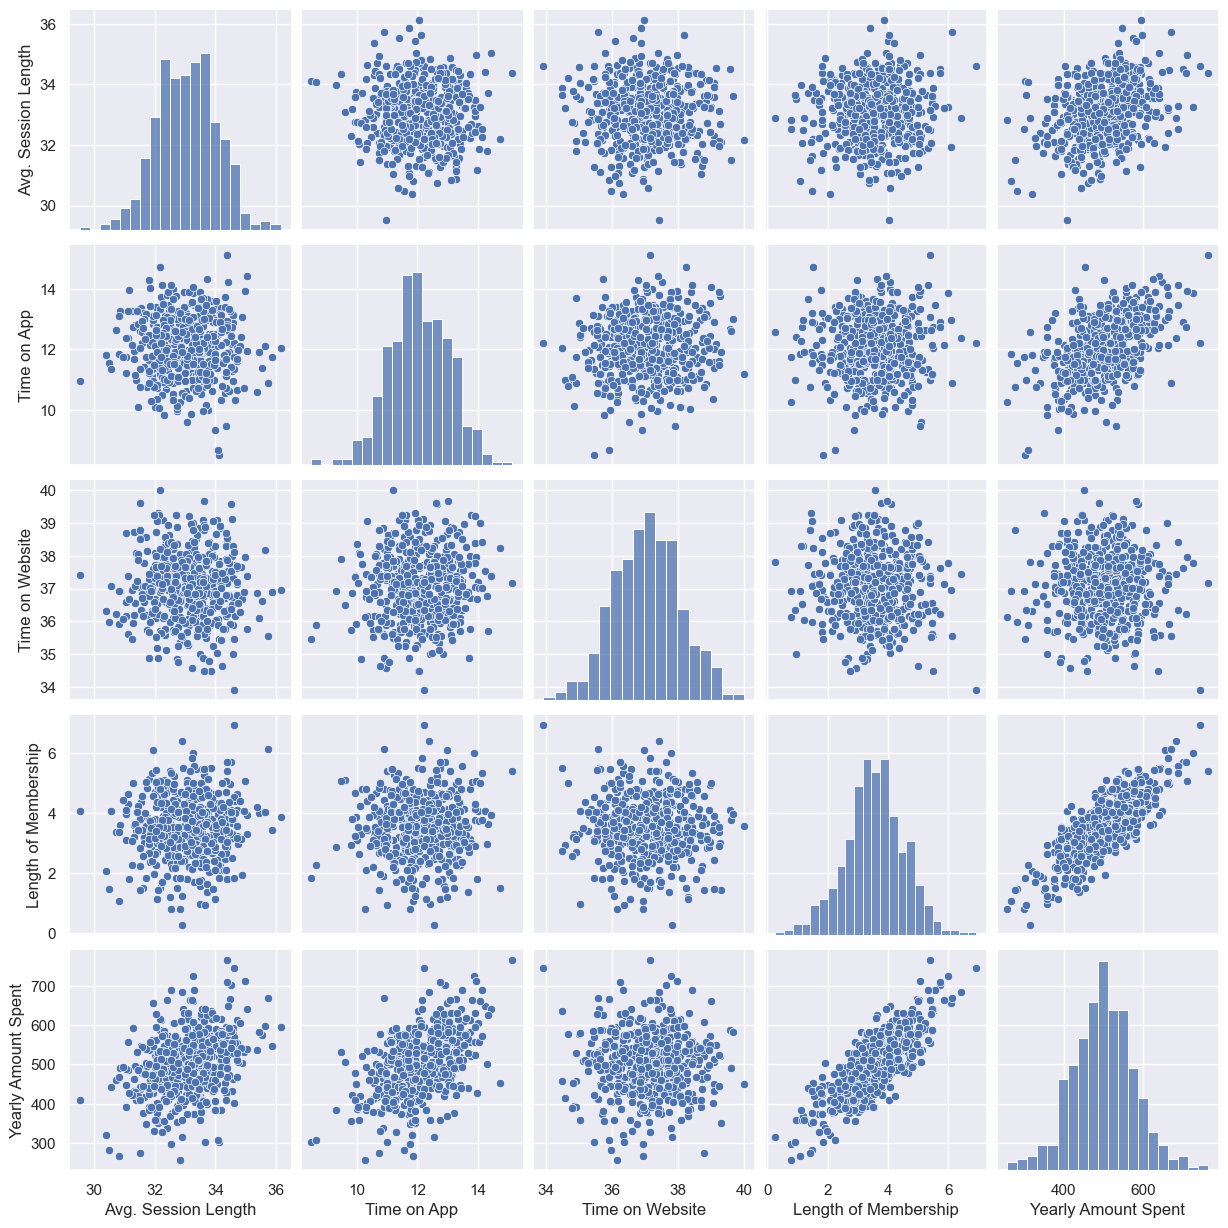

In [107]:
sns.pairplot(df)

**the most correlateed variable seems to be the yearly amount spent and the length of the membership**

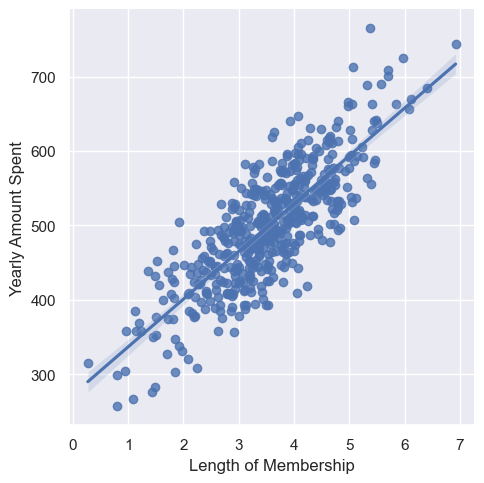

In [108]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

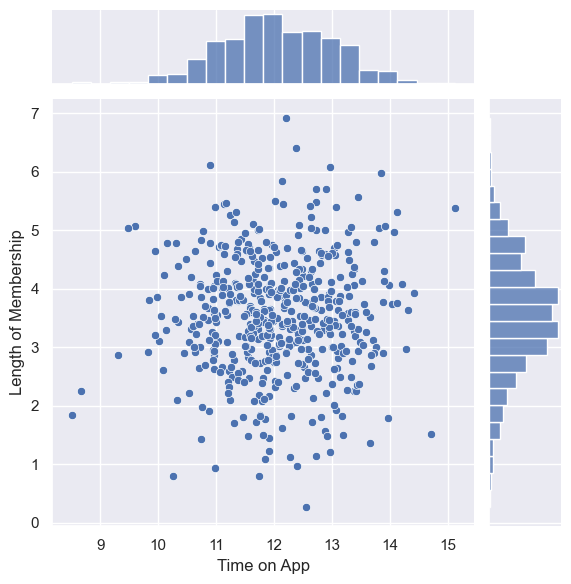

In [122]:
sns.jointplot(x='Time on App', y='Length of Membership',data=df)

**as we can see there is almost 0 correlation between the time on app and the length of the memebership**

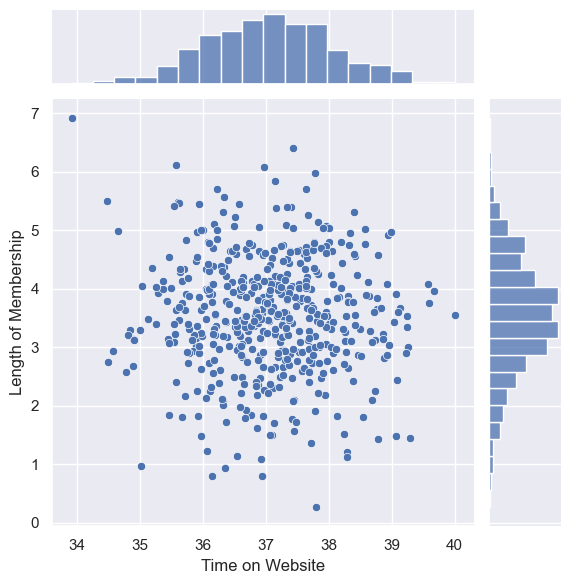

In [123]:
sns.jointplot(x='Time on Website', y='Length of Membership',data=df)

<Axes: xlabel='Time on App', ylabel='Time on Website'>

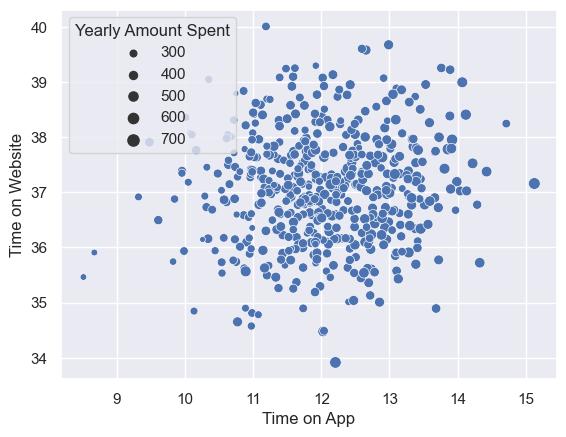

In [128]:
sns.scatterplot(x='Time on App', y='Time on Website',size='Yearly Amount Spent',data=df)

**Same goes the the time on Website**

# Preparing the Data

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [113]:
x = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y=df['Yearly Amount Spent']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


# Training the Data

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
lm = LinearRegression()
lm.fit(x_train,y_train)
lm.coef_

array([25.4118066 , 38.77026056,  0.53896722, 61.25375547])

# Predicting Test Data

Text(0, 0.5, 'Predicted Y')

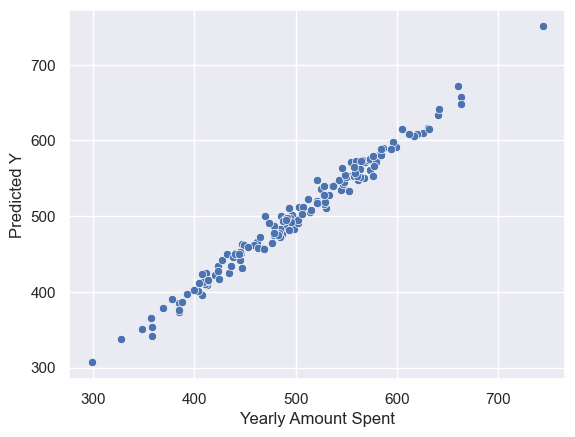

In [116]:
y_pred = lm.predict(x_test)
sns.scatterplot(x=y_test,y=y_pred)
plt.ylabel("Predicted Y")

# Evaluating the model

In [117]:
from sklearn import metrics
import numpy as np

In [118]:
print(f"MAE: {metrics.mean_absolute_error(y_test,y_pred)}\n")
print(f"MSE: {metrics.mean_squared_error(y_test,y_pred)}\n")
print(f"RMAE: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}\n")

MAE: 7.997381933020566

MSE: 95.66958600259638

RMAE: 9.781083068995803



# Residuals

**check wethe the residual distribution is normal**

C:\Users\admin\AppData\Local\Temp\ipykernel_2584\3458261683.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred,bins=50)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

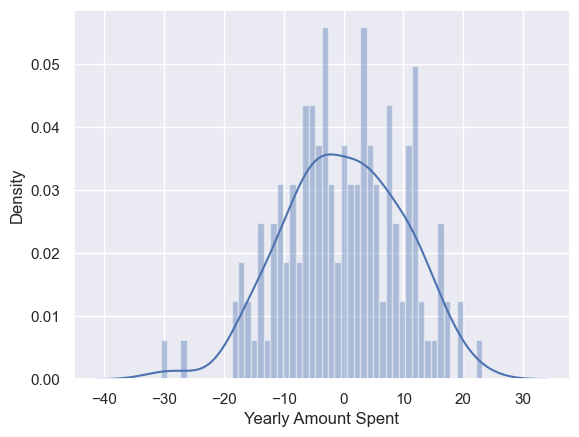

In [119]:
sns.distplot(y_test - y_pred,bins=50)

# Conclusion 

In [121]:
pd.DataFrame(lm.coef_,index=x.columns,columns=['Coefficient'])

,Coefficient
Avg. Session Length,25.411807
Time on App,38.770261
Time on Website,0.538967
Length of Membership,61.253755


**the strongest correlation  associated with the yearly amount spent was the length of the membership**


**Question**: Should we the cmpany focus more on the Mobile app or the Web App?
-as far as we can tell the Time on APP is much more correlated with the yearly amoun spent(38) compared to the Website APP(0.5), the answer to this question isn't getting any clear either way, since now we are not so sure whether to focus on the Web APP so it may catch up to the Moble APP or we will focus on the mobile app since it is performing.

**Supposition**: Both APP's are doing fine, the user use the WebAPP for searching the products , while they tend to mae the purchase witht the mobile APP (since it is more accessibal)
